In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
library(dplyr)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Group 18: How does height, ranking point and game duration relates to the age of right-handed tennis player in 2020

# Introduction:

### The Dataset:
Our project uses the dataset "atp_matches_2020.csv". It is a dataset that describes the game results of a specific tournament. Each observation includes the competition it was played in, surfaces played on, basic information of both winners and losers including: height, age, handedness, nationality, playing record, and many more. The dataset provides a detailed insight of all statistics relating to that particular match.

### About Our Project:
In professional tennis, players exhibit a wide range of skills and strategies that contribute to their success on the court. Among these factors, some of the significant aspects of a player's game are their handedness (whether they are left-handed or right-handed) and their physical data (weight, height, BMI, health condition etc). These are core data that are directly linked to an athlete’s potential, talent, and suitability in the sport, which is why atheetes have personal training teams to monitor their physical conditions to maximize their performance in matches. In our project, we will be focused primarily on predicting the age of a player based on ranking points, height and game duration. We expect that as the age of the player increases, ranking decreases and game duration shortens. However, we would not say that for certain without having the support from data analysis. Being able to make connections and prediction of age through these predictors allows us to further rationalize the relationships, and provide the public a biref understanding of whether age would affect the performance of tennis athelets. 

### Our Project Question:
Our project will investigate how the game duration, rank points and height of tennis players correlate with the age of right-handed players. 

In sporting events, numerous factors influence players' rankings and performance in diverse ways. For instance, individuals with older age may experience challenges in endurance-based cardio activities, highlighting the importance for athletes to maintain peak physical fitness levels. The age of a tennis player can be advantageous with younger players often displaying physical advantages and older players relying on experience, mental toughness, and strategic play. Achieving success in various sports, hinges on a specific range of ideal body measurements and biological factors. By meticulously analyzing data from numerous athletes, we can construct quantitative analysis to decipher and forecast the factors requisite for an ideal athlete. 


# Preliminary exploratory data analysis:


### Data reading

In [2]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv"
player_stats <- read_csv(url)
player_stats

Rows: 1462 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-8888,Atp Cup,Hard,24,A,20200106,300,104925,NA,NA,⋯,51,39,6,10,6,8,2,9055,1,9985
2020-8888,Atp Cup,Hard,24,A,20200106,299,105138,NA,NA,⋯,35,21,6,9,5,10,10,2335,34,1251
2020-8888,Atp Cup,Hard,24,A,20200106,298,104925,NA,NA,⋯,57,35,25,14,6,11,2,9055,5,5705
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2020-7485,Antwerp,Hard,32,A,20201019,128,126203,7,NA,⋯,37,30,5,9,3,5,28,1670,33,1402
2020-7485,Antwerp,Hard,32,A,20201019,129,144750,NA,Q,⋯,45,29,5,10,7,11,90,748,74,838
2020-7485,Antwerp,Hard,32,A,20201019,130,200005,NA,NA,⋯,32,26,7,9,2,4,38,1306,172,353


### Data cleaning
   We would like to follow the followings steps when cleaning data: 
1. filter players who are right-handed, which relates to the research topic
2. extracting only the predictors and age from the original table
3. using line plot to get a brief understanding of the ideal age used to divide category
4. set up age category
5. create plots to demonstrate the relationships between predictors and age

In [3]:
player_stats_righthanded <- filter (player_stats, grepl('R', winner_hand))
player_stats_righthanded

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-8888,Atp Cup,Hard,24,A,20200106,300,104925,NA,NA,⋯,51,39,6,10,6,8,2,9055,1,9985
2020-8888,Atp Cup,Hard,24,A,20200106,299,105138,NA,NA,⋯,35,21,6,9,5,10,10,2335,34,1251
2020-8888,Atp Cup,Hard,24,A,20200106,298,104925,NA,NA,⋯,57,35,25,14,6,11,2,9055,5,5705
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2020-7485,Antwerp,Hard,32,A,20201019,126,200267,NA,WC,⋯,45,27,10,12,4,9,528,58,45,1165
2020-7485,Antwerp,Hard,32,A,20201019,128,126203,7,NA,⋯,37,30,5,9,3,5,28,1670,33,1402
2020-7485,Antwerp,Hard,32,A,20201019,129,144750,NA,Q,⋯,45,29,5,10,7,11,90,748,74,838


In [4]:
player_stats_with_predictor <- select (player_stats_righthanded, winner_rank_points, winner_ht, winner_age, minutes) |>
                         drop_na()

player_stats_with_predictor

winner_rank_points,winner_ht,winner_age,minutes
<dbl>,<dbl>,<dbl>,<dbl>
9055,188,32.6,115
2335,183,31.7,97
9055,188,32.6,167
⋮,⋮,⋮,⋮
58,185,21.3,102
1670,193,22.9,67
748,193,23.6,84


In this step, we filtered the right-handed player and select only the winner rank points, winner height, game time data (predictors) and winner age (prediction). 

### Choosing Age Category 

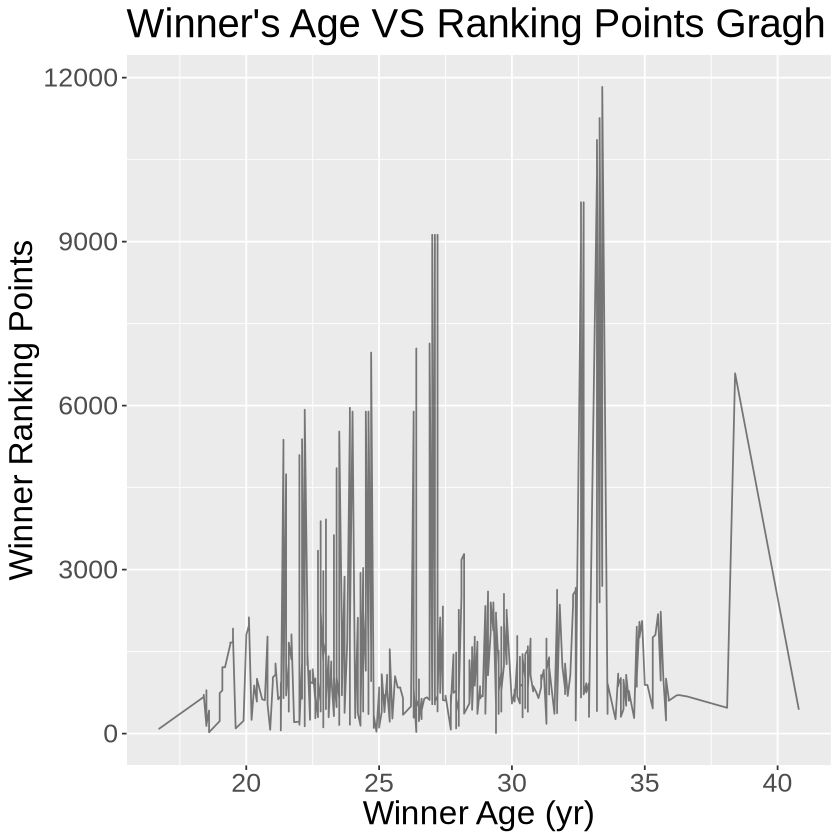

In [5]:
draft_plot <- ggplot (player_stats_with_predictor, aes(x = winner_age, y = winner_rank_points)) +
                    geom_line(alpha = 0.5) +
                    xlab("Winner Age (yr)") +
                    ylab("Winner Ranking Points") +
                    ggtitle("Winner's Age VS Ranking Points Gragh") +
                    theme(text = element_text(size = 20))
draft_plot

In this step, we create a graph of winner age versus ranking points to establish an age threshold for categorization. The graph reveals a distinct rise in ranking points around age 33. Therefore, we define the age category range as "young" for ages 0-32 and "old" for 33 or above.

In [11]:
stats_with_category <- player_stats_with_predictor |> 
                       mutate(age_category = ifelse(winner_age < 33, "young", "old"))|>
                       mutate(age_category = factor(age_category, levels=c("young","old")))
stats_with_category

winner_rank_points,winner_ht,winner_age,minutes,age_category
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9055,188,32.6,115,young
2335,183,31.7,97,young
9055,188,32.6,167,young
⋮,⋮,⋮,⋮,⋮
58,185,21.3,102,young
1670,193,22.9,67,young
748,193,23.6,84,young


### Creating Plots with Predictors to Briefly Understand the Relationship

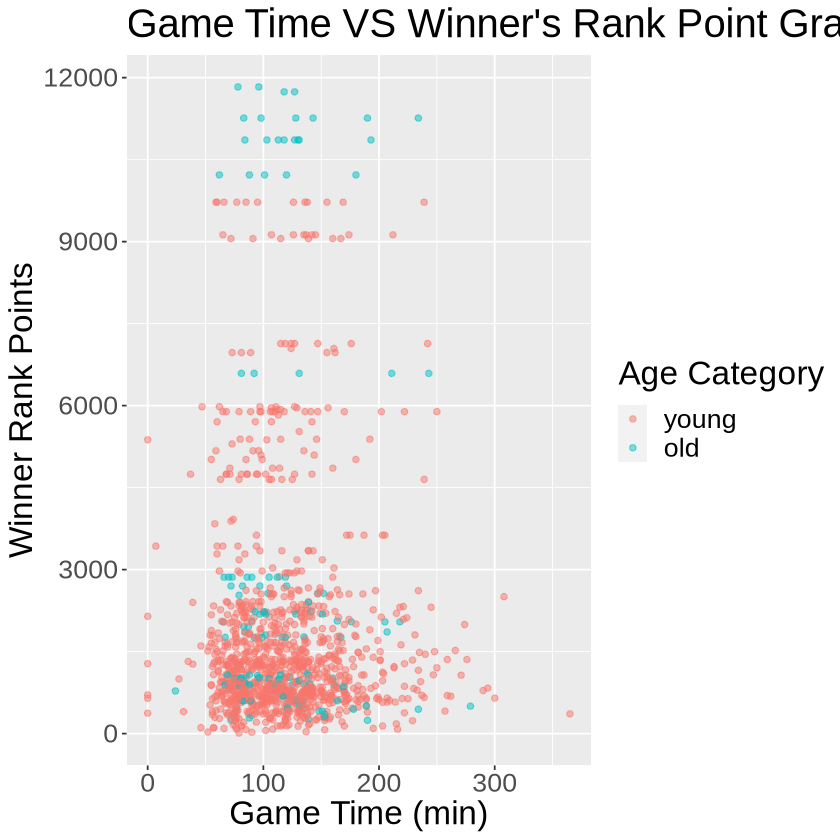

In [7]:
Time_Rank_plot <- ggplot (stats_with_category, aes(x = minutes, y = winner_rank_points)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Game Time (min)") +
                    ylab("Winner Rank Points") +
                    labs(colour = "Age Category") +
                    ggtitle("Game Time VS Winner's Rank Point Gragh") +
                    theme(text = element_text(size = 20))
Time_Rank_plot

In the Winner's Rank Point versus Game Time Graph, we notice a concentration of blue points in the upper left-middle section, while the majority of red points cluster in the bottom left-middle part. This suggests that older players tend to achieve higher rank points, while younger players typically have lower rank points. This trend may be attributed to the better skills and accumulated experience of older players compared to the youngers. Interestingly, game duration shows young player with most points falling within the range of 50-200 minutes, whereas old player's game duration is distributed along 50-250. This could be caused by the physical health among professional players, as young player may end the time faster due to their stronger respiratory system.

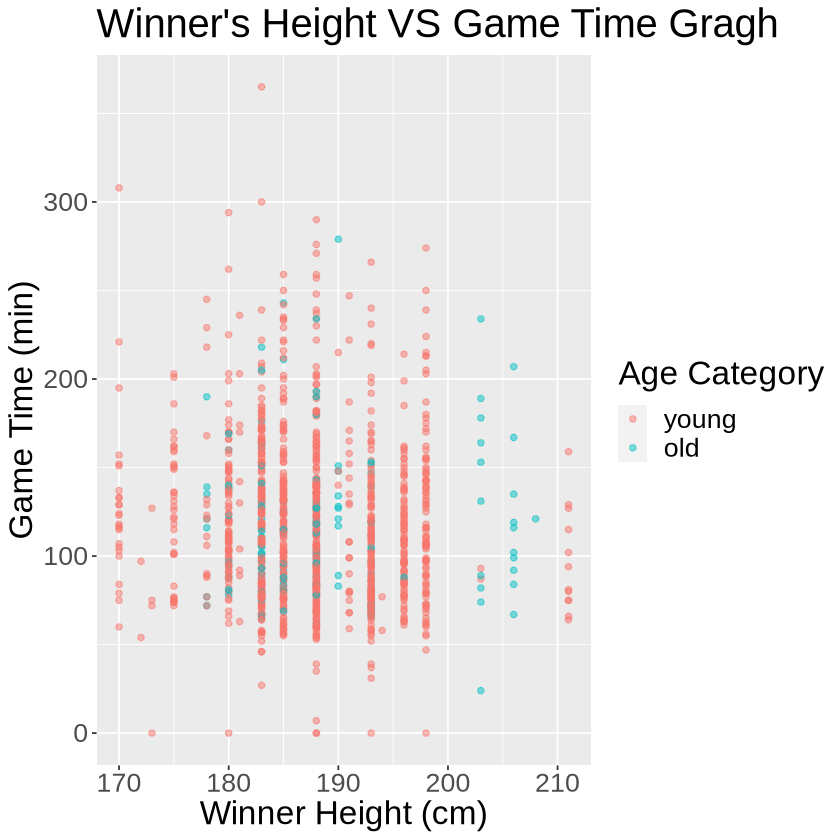

In [13]:
Height_Rank_plot <- ggplot (stats_with_category, aes(x = winner_ht, y = minutes)) +
                    geom_point(alpha = 0.5, aes(color = age_category)) +
                    xlab("Winner Height (cm)") +
                    ylab("Game Time (min)") +
                    labs(colour = "Age Category") +
                    ggtitle("Winner's Height VS Game Time Gragh") +
                    theme(text = element_text(size = 20))
Height_Rank_plot

In the Game Time versus Winner Height Graph, we observe that red points predominantly cluster towards the left and middle sections, while blue points are concentrated towards the right and middle sections. This suggests that younger players generally have slightly lower heights compared to older players. This trend could be attributed to the fact that players around 20 years old are still in a growth stage, so their recorded height may not yet be permanent at the time of data collection.

# Expected outcomes and significance:

### What do you expect to find?
We expect to predict the age of right-handed players based on their height, game duration and ranking points. From examining some prelimary data and then forming a training set, we can make a scatter plots that relates the height, game durtion and rank points together of right-handed players, and then predict which age category this player fits (age being splitted to young or old). Afterwards we seperate the clean data to training and testing set, and use this training set to predict what class of age an unknown right-handed tennis player would have.

### What impact could such findings have?
The impact of these findings can provide insight on whether tennis is a sport that depends on age  or not, and exploring will age affect a players performance. Often, height is essential factor a participant directly needs to excel in a sport, whereas game duration and ranking data are extern al critical information to reveal their performance as well. From this data, we want to see if this concept applies to tennis amongst right handed players (who are the majority). As a result, these findings can help tennis players see if they have an advantage in a professional career of tennis based on age.

### What future questions could this lead to?
- Can we use height to predict rankings of left-handed players?
- If height is a predictor, can weight also affect a player's ranking? (as they combined to perform calculations of BMI)
- Depending on the relationship seen, will these results affect a new player's interest in pursueing a professional career?